In [1]:
import json
from sdf import *
from render import *
from models import *

In [5]:
model = Net1()
#model = torch.load("model-snapshot.pt")
model.load_state_dict(torch.load("model-snapshot.pt"))

<All keys matched successfully>

{'ray_casts': 13753857, 'hits': tensor(247), 'time': 4.574415445327759}


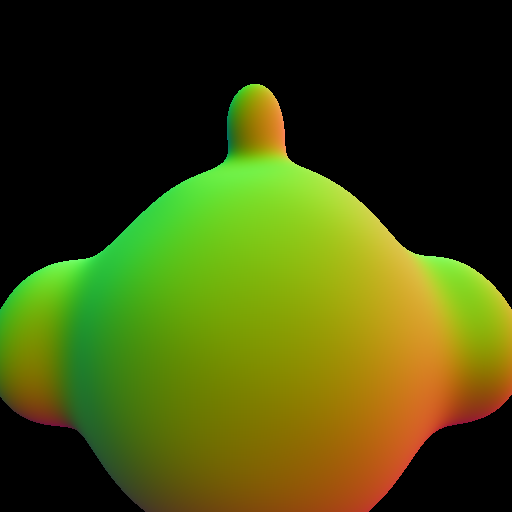

In [6]:

with torch.no_grad():
    image, stats = raymarch(model, torch.Tensor([0, .5, -2]), as_pil=True, size=512)
print(stats)
image

{'ray_casts': 3502994, 'hits': tensor(0), 'time': 0.4324805736541748}


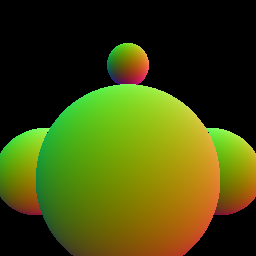

In [4]:
def sdf_scene(pos: torch.Tensor) -> torch.Tensor:
    d = sdf_sphere(pos, 1)
    d = torch.minimum(d, sdf_sphere(pos - torch.Tensor([-1,0,0]), .5))
    d = torch.minimum(d, sdf_sphere(pos - torch.Tensor([1,0,0]), .5))
    d = torch.minimum(d, sdf_sphere(pos - torch.Tensor([0,1.25,0]), .25))
    return d

image, stats = raymarch(sdf_scene, torch.Tensor([0, .5, -2]), as_pil=True, size=256)
print(stats)
image